- P(reserve_price=900) = 0
- P(reserve_price=p) linearly increases from 0 @ p=900 up to p=1000

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [2]:
d_price = 0.001

prices = np.arange(900, 1000, d_price)  # reserve price
a = 0.0002  # pdf slope
pdf = a * prices - 900 * a

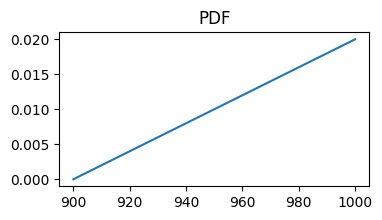

In [3]:
plt.figure(figsize=(4, 2))
plt.plot(prices, pdf)
plt.title('PDF')
plt.show()

In [4]:
cdf = (a / 2 * prices ** 2 - 900 * a * prices) - (a / 2 * 900 ** 2 - 900 * a * 900)

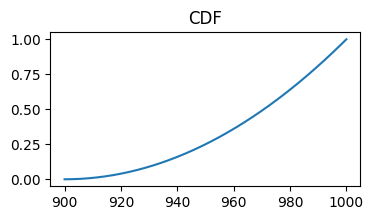

In [5]:
plt.figure(figsize=(4, 2))
plt.plot(prices, cdf)
plt.title('CDF')
plt.show()

In [7]:
dic_cdf = dict(zip(cdf, prices))

In [102]:
# %%time
# profits = {}
# for bid1 in np.arange(900, 1000):
#     for bid2 in np.arange(bid1, 1000):
#         profit = []
#         for _ in range(1000):
#             rand = np.random.random()
#             reserve_price = dic_cdf[cdf[cdf < rand][-1]]
#             if bid1 >= reserve_price:
#                 profit.append(1000 - bid1)
#             elif (bid1 < reserve_price) and (bid2 >= reserve_price):
#                 profit.append(1000 - bid2)
#             else:
#                 profit.append(0) 
#         profit = np.mean(profit)
#         profits[(bid1, bid2)] = profit

CPU times: total: 6min 16s
Wall time: 6min 18s


In [8]:
with open('save/round_1/profits.pickle', 'rb') as f:
    profits = pickle.load(f)

In [9]:
max_profit = max(profits.values())
best_bids = [k for k, v in profits.items() if v == max_profit]
print(f'Bid 1: {best_bids[0][0]}, Bid 2: {best_bids[0][1]}, profit: {max_profit}')

Bid 1: 939, Bid 2: 970, profit: 21.642


In [114]:
# with open('save/round_1/profits.pickle', 'wb') as f:
#     pickle.dump(profits, f)

In [10]:
x_unique = np.unique(np.array([key[0] for key in profits.keys()]))
y_unique = np.unique(np.array([key[1] for key in profits.keys()]))
x, y = np.meshgrid(x_unique, y_unique)
z = np.zeros(x.shape)
for i, xi in enumerate(x_unique):
    for j, yi in enumerate(y_unique):
        z[i, j] = profits.get((xi, yi), 0)

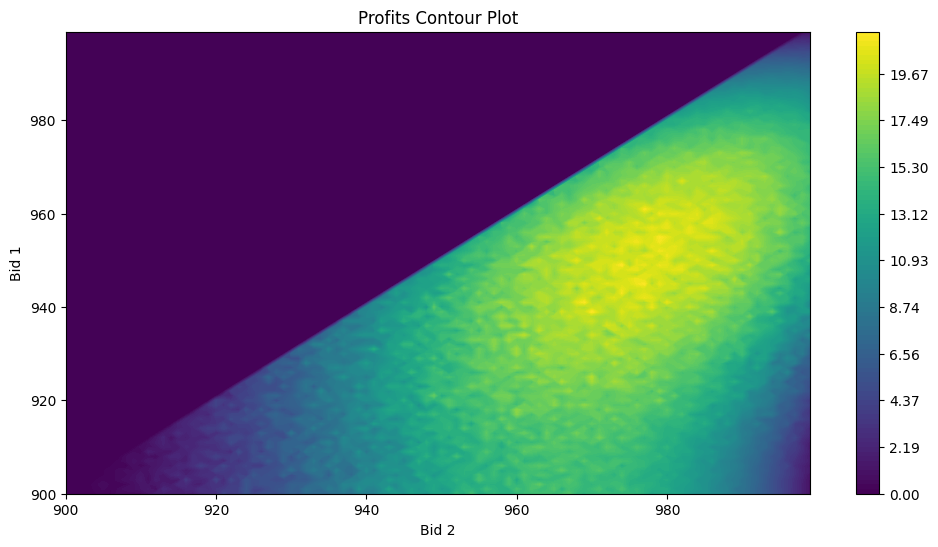

In [11]:
plt.figure(figsize=(12, 6))
plt.contourf(x, y, z, levels=np.linspace(z.min(), z.max(), 100), cmap='viridis')
plt.colorbar()
plt.title('Profits Contour Plot')
plt.xlabel('Bid 2')
plt.ylabel('Bid 1')
plt.show()

Best bids:  953 979


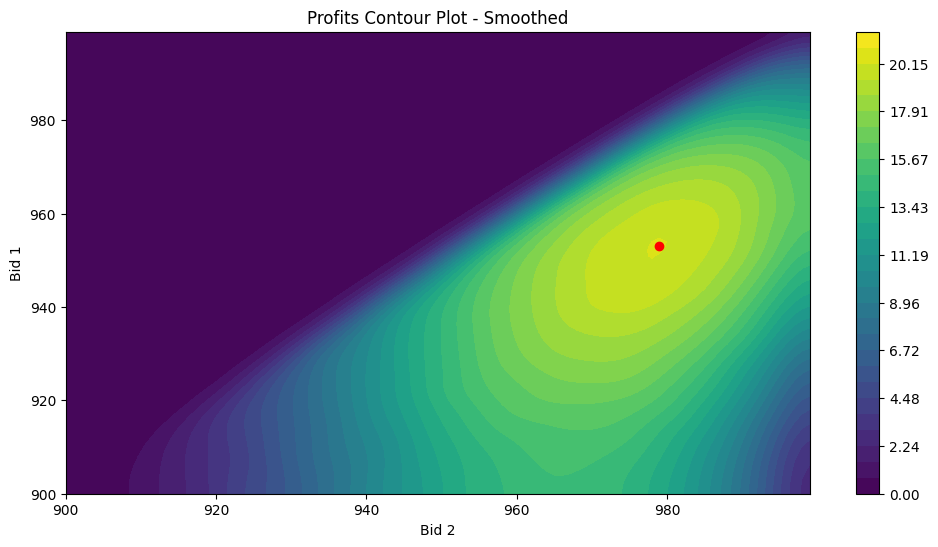

In [12]:
z_denoised = gaussian_filter(z, sigma=2.8)
bid1_opt = x_unique[np.where(z_denoised == z_denoised.max())[0][0]]
bid2_opt = y_unique[np.where(z_denoised == z_denoised.max())[1][0]]
print('Best bids: ', bid1_opt, bid2_opt)

plt.figure(figsize=(12, 6))
plt.contourf(x, y, z_denoised, levels=np.linspace(z.min(), z.max(), 30), cmap='viridis')
plt.plot(bid2_opt, bid1_opt, 'ro')
plt.colorbar()
plt.title('Profits Contour Plot - Smoothed')
plt.xlabel('Bid 2')
plt.ylabel('Bid 1')
plt.show()

In [303]:
l_bid1, l_bid2 = [], []
sig_range = np.arange(0, 5, 0.01)
for sig in sig_range:
    z_denoised = gaussian_filter(z, sigma=sig)
    bid1_opt = x_unique[np.where(z_denoised == z_denoised.max())[0][0]]
    bid2_opt = y_unique[np.where(z_denoised == z_denoised.max())[1][0]]
    l_bid1.append(bid1_opt)
    l_bid2.append(bid2_opt)

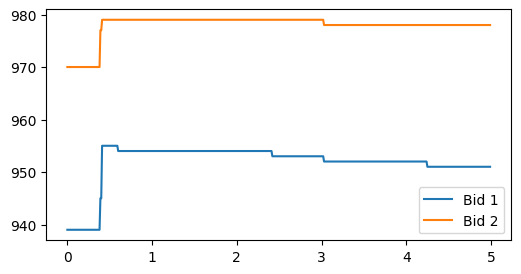

In [304]:
plt.figure(figsize=(6, 3))
plt.plot(sig_range, l_bid1, label='Bid 1')
plt.plot(sig_range, l_bid2, label='Bid 2')
plt.legend()
plt.show()

In [ ]:
%%time
profits_fine = {}
for bid1 in np.arange(930, 960):
    for bid2 in np.arange(970, 990):
        profit = []
        for _ in range(10000):
            rand = np.random.random()
            reserve_price = dic_cdf[cdf[cdf < rand][-1]]
            if bid1 >= reserve_price:
                profit.append(1000 - bid1)
            elif (bid1 < reserve_price) and (bid2 >= reserve_price):
                profit.append(1000 - bid2)
            else:
                profit.append(0) 
        profit = np.mean(profit)
        profits_fine[(bid1, bid2)] = profit